# Logistic Regression

### Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pickle
from sklearn.model_selection import GridSearchCV

### Data Preparation

In [4]:
df = pd.read_csv('Data/voice.csv')

x = df.iloc[:,:-1]
y = df.label

### Methodology

In [5]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [5]:
param_grid = {
    'C' : np.logspace(-4, 4, 5),
    'max_iter' : [100, 1000, 10000, 100000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ............C=0.0001, max_iter=100;, score=0.501 total time=   0.0s
[CV 2/5] END ............C=0.0001, max_iter=100;, score=0.501 total time=   0.0s
[CV 3/5] END ............C=0.0001, max_iter=100;, score=0.501 total time=   0.0s
[CV 4/5] END ............C=0.0001, max_iter=100;, score=0.501 total time=   0.0s
[CV 5/5] END ............C=0.0001, max_iter=100;, score=0.502 total time=   0.0s
[CV 1/5] END ...........C=0.0001, max_iter=1000;, score=0.501 total time=   0.0s
[CV 2/5] END ...........C=0.0001, max_iter=1000;, score=0.501 total time=   0.0s
[CV 3/5] END ...........C=0.0001, max_iter=1000;, score=0.501 total time=   0.0s
[CV 4/5] END ...........C=0.0001, max_iter=1000;, score=0.501 total time=   0.0s
[CV 5/5] END ...........C=0.0001, max_iter=1000;, score=0.502 total time=   0.0s
[CV 1/5] END ..........C=0.0001, max_iter=10000;, score=0.501 total time=   0.0s
[CV 2/5] END ..........C=0.0001, max_iter=10000

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'max_iter': [100, 1000, 10000, 100000]},
             verbose=3)

In [6]:
print(f'Params: {grid.best_params_}')

Params: {'C': 10000.0, 'max_iter': 100}


In [6]:
LRmodel = LogisticRegression(max_iter=10000, C=10000.0)
LRmodel.fit(x_train,y_train)
pickle.dump(LRmodel, open("Models/LR.pickle", "wb"))
y_pred = LRmodel.predict(x_test)

### Evaluation

#### Accuracy

In [14]:
print("Log Reg Accuracy score: ",accuracy_score(y_pred,y_test)*100,"%")

Log Reg Accuracy score:  97.0031545741325 %


#### Confusion Matrix

In [8]:
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)

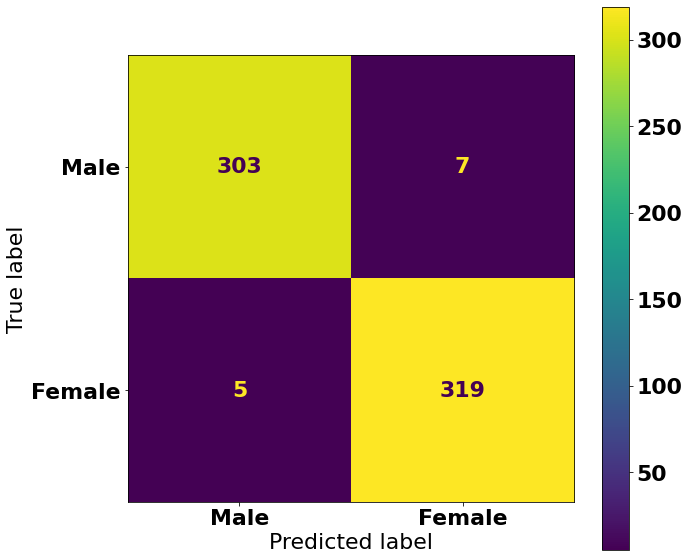

In [10]:
c = confusion_matrix(y_test, y_pred)
cp = ConfusionMatrixDisplay(c, display_labels=["Male", "Female"])
fig, ax = plt.subplots(figsize=(10,10))
cp.plot(ax = ax)

#### Classification Report

In [15]:
print("\t\t\tLogistic Regression report:\n", classification_report(y_pred,y_test, digits=3))

			Logistic Regression report:
               precision    recall  f1-score   support

      female      0.962     0.977     0.970       309
        male      0.978     0.963     0.971       325

    accuracy                          0.970       634
   macro avg      0.970     0.970     0.970       634
weighted avg      0.970     0.970     0.970       634



#### Feature Importance

In [15]:
importances = abs(LRmodel.coef_[0])
importances_total = sum(importances)
for i in range(len(importances)):
    importances[i] = (importances[i]/10000)*importances_total
importances_df = pd.DataFrame({'Feature_names':x_train.columns, 'Importance':importances})
importances_df = importances_df.sort_values(by=['Importance'], ascending=False)

Text(0, 0.5, 'Importance')

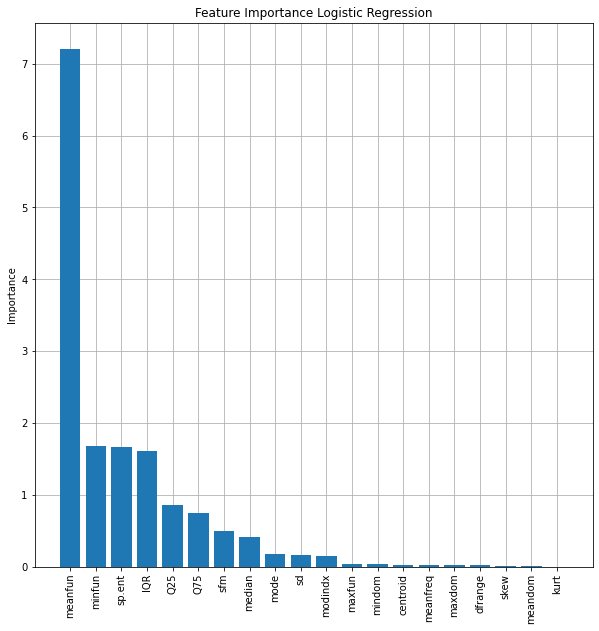

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(zorder=0)
ax.bar(importances_df['Feature_names'], importances_df['Importance'], zorder=3)
plt.xticks(rotation = 90) 
ax.set_title("Feature Importance Logistic Regression")
ax.set_ylabel("Importance")